# Match Winner Dataset

In [86]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline

# Load Dataset

In [87]:
df = pd.read_csv('./data/matches.csv')

# Analyze Match Dataset

In [88]:
df.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [89]:
df.shape

(636, 18)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [91]:
# df.city = pd.factorize(df.city)[0]
# df.team1 = pd.factorize(df.team1)[0]
# df.team2 = pd.factorize(df.team2)[0]
# df.toss_winner = pd.factorize(df.toss_winner)[0]
# df.winner = pd.factorize(df.winner)[0]
# df.player_of_match = pd.factorize(df.player_of_match)[0]
# df.venue = pd.factorize(df.venue)[0]
# df.result = pd.factorize(df.result)[0]
# df.umpire1 = pd.factorize(df.umpire1)[0]
# df.umpire2 = pd.factorize(df.umpire2)[0]
# df.umpire3 = pd.factorize(df.umpire3)[0]
# df.season = pd.factorize(df.season)[0]
# df.season = pd.factorize(df.season)[0]
# df.date = pd.factorize(df.date)[0]
# df.toss_decision = pd.factorize(df.toss_decision)[0]
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
print(char_cols)
for c in char_cols:
    df[c] = pd.factorize(df[c])[0]
print (df)

Index(['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')
      id  season  city  date  team1  team2  toss_winner  toss_decision  \
0      1    2017     0     0      0      0            0              0   
1      2    2017     1     1      1      1            1              0   
2      3    2017     2     2      2      2            2              0   
3      4    2017     3     3      3      3            3              0   
4      5    2017     4     3      4      4            0              1   
5      6    2017     0     4      2      5            4              0   
6      7    2017     5     4      5      6            5              0   
7      8    2017     3     5      4      3            0              1   
8      9    2017     1     6      6      1            1              0   
9     10    2017     5     7      0      6            5              0   
10    11    2

In [92]:
df.describe()

id       season        city        date       team1  \
count  636.000000   636.000000  636.000000  636.000000  636.000000   
mean   318.500000  2012.490566    8.503145  222.039308    5.677673   
std    183.741666     2.773026    6.985361  127.650149    3.339320   
min      1.000000  2008.000000   -1.000000    0.000000    0.000000   
25%    159.750000  2010.000000    4.000000  112.000000    4.000000   
50%    318.500000  2012.000000    7.000000  221.500000    6.000000   
75%    477.250000  2015.000000   11.000000  331.250000    8.000000   
max    636.000000  2017.000000   29.000000  449.000000   13.000000   

            team2  toss_winner  toss_decision      result  dl_applied  \
count  636.000000   636.000000     636.000000  636.000000  636.000000   
mean     5.044025     5.454403       0.429245    0.020440    0.025157   
std      3.406979     3.418264       0.495358    0.171764    0.156726   
min      0.000000     0.000000       0.000000    0.000000    0.000000   
25%      2.000000     3.000000       0.000000    0.000000    0.000000   
50%      4.000000     5.000000       0.000000    0.000000    0.000000   
75%      8.000000     8.000000       1.000000    0.000000    0.000000   
max     13.000000    13.000000       1.000000    2.000000    1.000000   

           winner  win_by_runs  win_by_wickets  player_of_match       venue  \
count  636.000000   636.000000      636.000000       636.000000  636.000000   
mean     5.257862    13.682390        3.372642        79.149371   10.946541   
std      3.054804    23.908877        3.420338        55.622813    8.887768   
min     -1.000000     0.000000        0.000000        -1.000000    0.000000   
25%      3.000000     0.000000        0.000000        29.000000    5.000000   
50%      5.000000     0.000000        4.000000        67.000000    7.000000   
75%      8.000000    20.000000        7.000000       123.250000   14.000000   
max     13.000000   146.000000       10.000000       200.000000   34.000000   

          umpire1     umpire2  umpire3  
count  636.000000  636.000000      0.0  
mean    17.091195   18.188679      NaN  
std     10.453550   13.102705      NaN  
min     -1.000000   -1.000000      NaN  
25%      9.000000    4.000000      NaN  
50%     16.000000   16.000000      NaN  
75%     23.000000   30.000000      NaN  
max     43.000000   44.000000      NaN

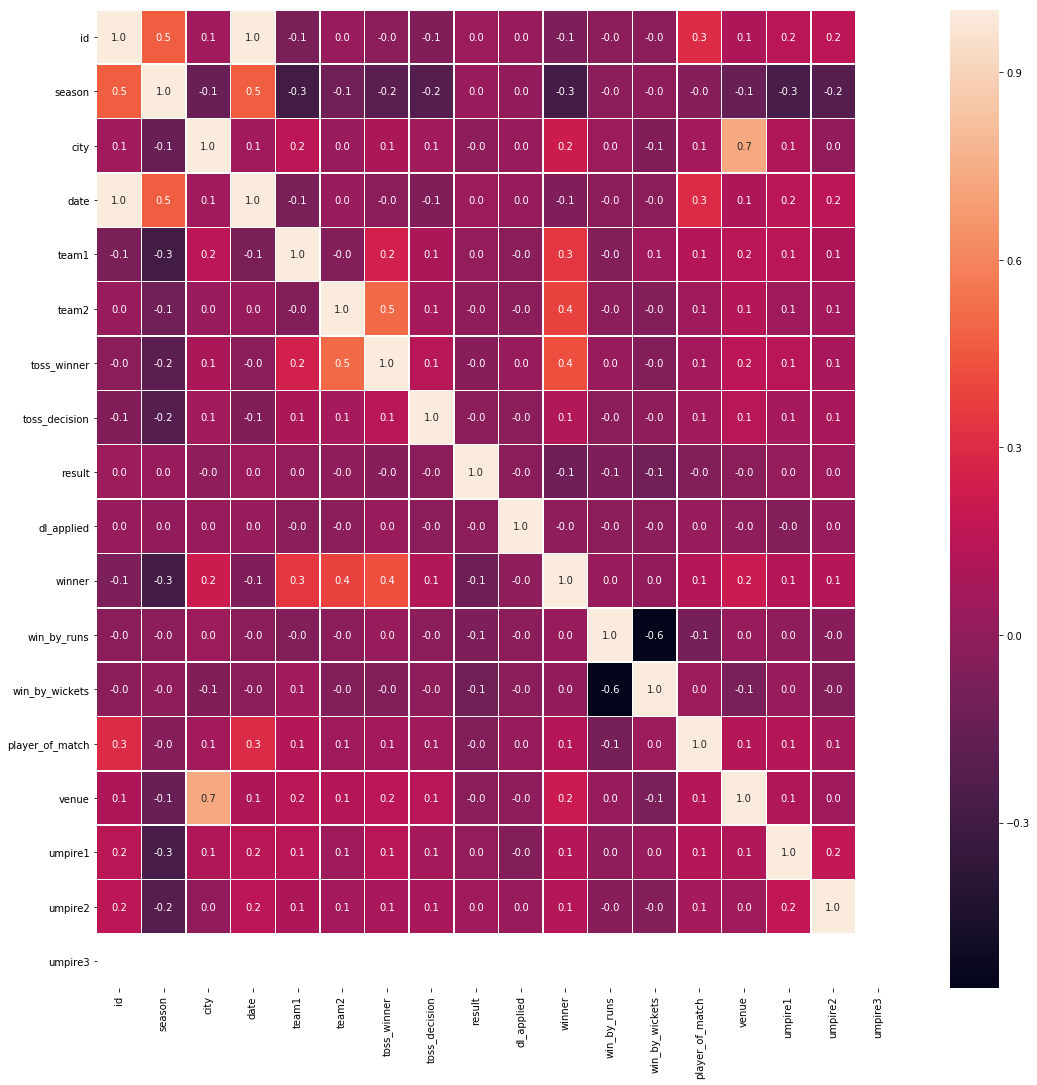

In [93]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

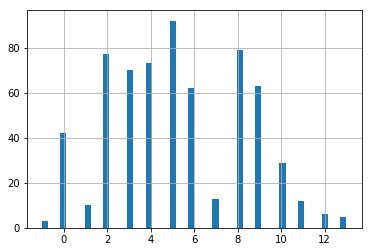

In [94]:
df['winner'].hist(bins=50)

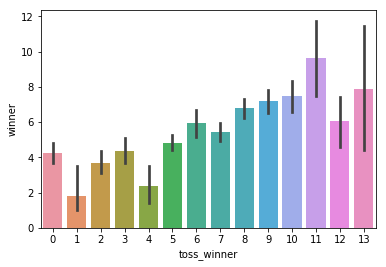

In [95]:
sns.barplot(x='toss_winner', y='winner',data=df)

Text(0.5,1,'Match winners')

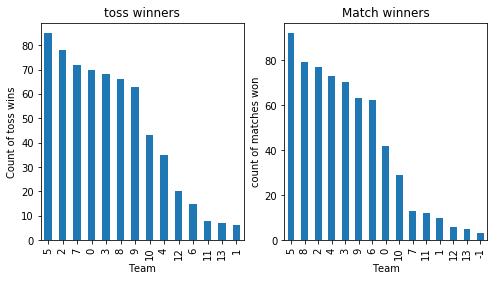

In [96]:
fig = plt.figure(figsize=(8,4))
t1=df['toss_winner'].value_counts(sort=True)
t2=df['winner'].value_counts(sort=True)
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
t1.plot(kind='bar')
ax2 = fig.add_subplot(122)
t2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [97]:
# Removing columns from DataFrame

X = df.drop(['date','umpire1','umpire2','umpire3','id','player_of_match','winner','city'], axis=1)
y = df['winner']

In [98]:
df_with_dummies = pd.get_dummies( X, columns=X.columns, prefix = X.columns)
all_features = list(df_with_dummies.columns)
df_with_dummies.head()

season_2008  season_2009  season_2010  season_2011  season_2012  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   season_2013  season_2014  season_2015  season_2016  season_2017    ...     \
0            0            0            0            0            1    ...      
1            0            0            0            0            1    ...      
2            0            0            0            0            1    ...      
3            0            0            0            0            1    ...      
4            0            0            0            0            1    ...      

   venue_25  venue_26  venue_27  venue_28  venue_29  venue_30  venue_31  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   venue_32  venue_33  venue_34  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  
4         0         0         0  

[5 rows x 191 columns]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               636 non-null int64
date               636 non-null int64
team1              636 non-null int64
team2              636 non-null int64
toss_winner        636 non-null int64
toss_decision      636 non-null int64
result             636 non-null int64
dl_applied         636 non-null int64
winner             636 non-null int64
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    636 non-null int64
venue              636 non-null int64
umpire1            636 non-null int64
umpire2            636 non-null int64
umpire3            0 non-null float64
dtypes: float64(1), int64(17)
memory usage: 89.5 KB


In [100]:
# The StandardScaler assumes your data is normally distributed within each feature 
# and will scale them such that the distribution is now centred around 0, 
# with a standard deviation of 1.
# fsc = StandardScaler()
# X_train = fsc.fit_transform(X_train)
# X_test = fsc.transform(X_test)

In [101]:
models = []
models.append(("Logistic Regression:", LogisticRegression()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree Classifier:", DecisionTreeClassifier()))
models.append(("Random Forest Classifier:", RandomForestClassifier(n_estimators=10)))
models.append(("MLP:", MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("GradientBoostingClassifier:", GradientBoostingClassifier(n_estimators = 128)))
models.append(("SVC:", SVC(kernel = 'rbf', random_state = 0)))
models.append(("XGBClassifier:", XGBClassifier()))

print('Models appended...')

Models appended...


In [102]:
results = []
PlotResults = []
PlotNames = []
names = []
def run_models():
    for name,model in models:
        cv_result = cross_val_score(model, df_with_dummies, y.values.ravel(), cv = 4, scoring = "accuracy")
        names.append(name)
        results.append(cv_result)
    for i in range(len(names)):
        print(names[i],results[i].mean()*100)
        PlotResults.append(results[i].mean()*100)
        PlotNames.append(names[i])


In [103]:
run_models()

/Users/prhk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/Users/prhk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/Users/prhk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
/Users/prhk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 membe

Logistic Regression: 54.0216473757
K-Nearest Neighbour: 65.4965049108
Decision Tree Classifier: 86.5054272438
Random Forest Classifier: 76.0073170717
MLP: 79.3529036374
GradientBoostingClassifier: 97.9782599196
SVC: 34.3274085164
XGBClassifier: 96.7494555478


# Accuracy Result plot

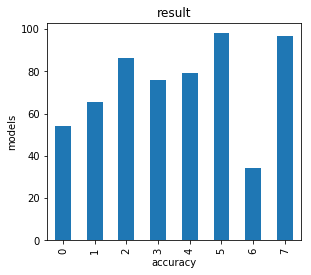

In [105]:
fig = plt.figure(figsize=(10,4))
df = pd.DataFrame({'x': PlotResults, 'y': PlotNames})
ax1 = fig.add_subplot(121)
ax1.set_xlabel('accuracy')
ax1.set_ylabel('models')
ax1.set_title("result")
df['x'].plot(kind='bar')

In [ ]:
models_gs = {
    'K-Nearest Neighbour': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

params_gs = { 
    'K-Nearest Neighbour': {'n_neighbors':[3, 5, 8]},
    'Decision Tree Classifier': {'max_depth': [8, 16, 32]},
    'RandomForestClassifier': { 'n_estimators': [32, 64, 128] },
    'GradientBoostingClassifier': { 'n_estimators': [128, 256, 512], 'learning_rate': [0.05, 0.1, 0.3, 0.9] }
}

In [ ]:
def run_models_with_GS(models_gs, params_gs):
    results = []
    for model in models_gs:
        grid_search = GridSearchCV(estimator = models_gs[model],
                                   param_grid = params_gs[model],
                                   scoring = 'accuracy',
                                   cv = None, n_jobs = 6)
        grid_search.fit(X, y)
        best_accuracy = grid_search.best_score_
        best_parameters = grid_search.best_params_
        #here is the best accuracy
        results.append(( model, best_accuracy, best_parameters ))
    return results

In [ ]:
results = run_models_with_GS(models_gs, params_gs)
for model, accuracy, params in results:
    print(model, accuracy * 100, params)